In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv('./dataset/movies.csv')

In [4]:
df.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [8]:
columns = ['title','genres','keywords','overview']

In [9]:
df = df[columns]

In [10]:
df.head(2)

,title,genres,keywords,overview
0,Avatar,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di..."
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4803 non-null   object
 1   genres    4775 non-null   object
 2   keywords  4391 non-null   object
 3   overview  4800 non-null   object
dtypes: object(4)
memory usage: 150.2+ KB


In [12]:
df.isnull().sum()

title         0
genres       28
keywords    412
overview      3
dtype: int64

In [13]:
df = df.dropna().reset_index(drop=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     4387 non-null   object
 1   genres    4387 non-null   object
 2   keywords  4387 non-null   object
 3   overview  4387 non-null   object
dtypes: object(4)
memory usage: 137.2+ KB


In [17]:
df['combined'] = df['genres'] + ' ' + df['keywords'] + ' ' + df['overview']

In [18]:
df.head(2)

,title,genres,keywords,overview,combined
0,Avatar,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Action Adventure Fantasy Science Fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Adventure Fantasy Action ocean drug abuse exot...


In [19]:
data = df[['title','combined']]

In [21]:
data.head(2)

,title,combined
0,Avatar,Action Adventure Fantasy Science Fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...


In [22]:
data.shape

(4387, 2)

In [27]:
#word cloud on movie content
combined_text = " ".join(df['combined'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

<function matplotlib.pyplot.show(close=None, block=None)>

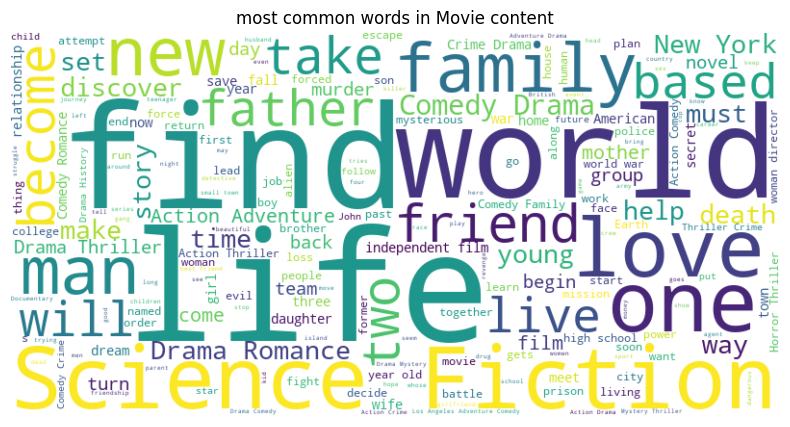

In [28]:
#wordcloud to visualize the most common words in movie content

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("most common words in Movie content") 
plt.show

In [29]:
# download the nltk data

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vian0001\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\vian0001\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vian0001\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [30]:
stop_words = set(stopwords.words('english'))

In [31]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # convert to lowercase
    text = text.lower()

    # tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [words for words in tokens if words not in stop_words]
    
    return " ".join(tokens)

In [32]:
data['cleaned_data'] = df['combined'].apply(preprocess_text)

C:\Users\vian0001\AppData\Local\Temp\1\ipykernel_3696\2007356946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_data'] = df['combined'].apply(preprocess_text)


In [34]:
data.head(5)

,title,combined,cleaned_data
0,Avatar,Action Adventure Fantasy Science Fiction cultu...,action adventure fantasy science fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...,adventure fantasy action ocean drug abuse exot...
2,Spectre,Action Adventure Crime spy based on novel secr...,action adventure crime spy based novel secret ...
3,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...,action crime drama thriller dc comics crime fi...
4,John Carter,Action Adventure Science Fiction based on nove...,action adventure science fiction based novel m...


In [35]:
# Vectorization using Tfidf
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(data['cleaned_data'])

In [36]:
# compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [37]:
# recommendation function
def recommend_movies(movie_name, cosine_sim=cosine_sim, df=data, top_n=5):
    # find the index of the movie
    idx = df[df['title'].str.lower() == movie_name.lower()].index
    if len(idx) == 0:
        return "Movie not found in dataset!"
    idx = idx[0]

    # get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # get movie indices
    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

In [38]:
data['title']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4382                                        Bang
4383                                      Primer
4384                                 El Mariachi
4385                   Signed, Sealed, Delivered
4386                           My Date with Drew
Name: title, Length: 4387, dtype: object

In [43]:
#row_index = df[df['title'] == "El Mariachi"].index
row_index = df[df['title'] == "Iron Man 2"].index

print(row_index)

Index([78], dtype='int64')


In [50]:
row_index = int(row_index[0])

In [52]:
movie_name = data['title'][78]
print(movie_name)

Iron Man 2


In [53]:
# example recommendation

print(f"Recommeded for the Movie {movie_name} ")
recommendations = recommend_movies(movie_name)
print(recommendations)

Recommeded for the Movie Iron Man 2 
68                    Iron Man
7      Avengers: Age of Ultron
506                      X-Men
64           X-Men: Apocalypse
172        The Incredible Hulk
Name: title, dtype: object
